<center>
<div>
<div dir="rtl"> 
<h1>
دانشگاه صنعتی امیرکبیر
</h1>
</div>
<div dir="rtl"> 
<h1>
دانشکده مهندسی کامپیوتر
</h1>
</div>
<div dir="rtl"> 
<h2>
پروژه دوم جبر خطی کاربردی
</h2>
</div>
<div dir="rtl"> 
<h2>
استاد درس: دکتر ناظرفرد
</h2>
</div>
<div dir="rtl"> 
<h2>
تدریس‌یاران: سارا روحانی، امیرحسین پولاد، محمد حیدری راد، امیرمحمد جعفری، عسل دلخوش، ثمین  مهدی‌پور، محمدحسین عارف، محمد عشرت‌آبادی
</h2>
</div>
</div>
</center>

In [465]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt


Input array shape for 2 triangles is:
(6, 2)


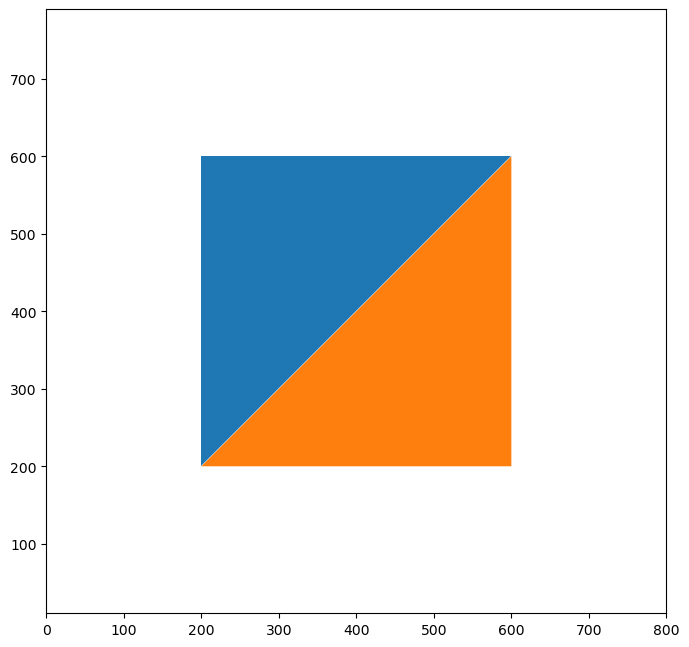

In [480]:
#****I change this function to give limits of axises in input
#input: list of n triangles (3n vertices), as an nparray with shape (3n,2)
#output: rasterized screen
def raster(tris, ylim1, ylim2, xlim1, xlim2):
    list = np.array_split(tris, int(np.shape(tris)[0]/3) , axis=0)
    plt.figure(figsize=(8, 8), dpi=100)
    plt.axis('equal')
    for tri in list:
        x = tri[ :,0]
        y = tri[ :,1]
        plt.fill(x, y)
    plt.ylim([ylim1,ylim2])
    plt.xlim([xlim1,xlim2])
    plt.show()


cube_on_screen = np.array([[200,200],[200,600],[600,600],[200,200],[600,600],[600,200]])
print("Input array shape for 2 triangles is:")
print(np.shape(cube_on_screen))
raster(cube_on_screen, 0, 800, 0, 800)

<div dir="rtl"> 
<h1>
چگونه یک مکعب را رندر کنیم (مقدمه‌ای بر گرافیک کامپیوتری)
</h1>
</div>
<div dir="rtl"> 
</div>
<div dir="rtl"> 
رندر کردن فرایندی است که در آن یک مدل سه بعدی شامل لیستی از نقاط در فضای سه بعدی به یک تصویر دو بعدی قابل نمایش تبدیل می‌شود. در این پروژه با همدیگر برخی مراحل از انجام این کار را انجام می‌دهیم. به عنوان قرارداد، از دستگاه مختصات چپ دست و محور y بالا استفاده می‌کنیم. 
</div>

![title](img/coord.jpg)

<div dir="rtl"> 
برای اینکه این کار را انجام دهیم، ابتدا باید ۳ فضای مختلف را تعریف کنیم:
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
<h3>
فضای مدل:
</h3>
</div>

<div dir="rtl"> 
این فضا، فضاییست که مدل سه بعدی ما در آن تعریف شده. هر مدل سه بعدی یک فضای مدل مخصوص خود دارد. برای مثال اگر یک معکب ۱ در ۱ در ۱ داشته باشیم، مختصات نقاط در فضای مدل به صورت زیر خواهد بود:
</div>
[(0,0,0), (0,1,0), (1,1,0), (1,0,0), (0,0,1), (0,1,1), (1,1,1), (1,0,1)]

![title](img/ModelSpace.jpg)

<div dir="rtl">
<h3>
فضای جهان:
</h3>
اگر مدل را در فضای سه بعدی جهان کلی خود قرار دهیم، این مدل ممکن است بچرخد، بزرگ یا کوچک شود و یا مکان آن تغییر بکند. برای انجام این ۳ تبدیل خطی، به ۳ ماتریس Rotation، Scale و Translation نیاز داریم. با اعمال این ۳ ماتریس به نقاط در فضای مدل، به نقاط در فضای جهان می‌رسیم.
</div>

![title](img/WorldSpace.jpg)

<div dir="rtl"> 

</div>

<div dir="rtl"> 
<h3>
فضای دوربین:
</h3>
از آنجایی که توسط یک دوربین فرضی به جهان نگاه خواهیم کرد، نیاز داریم دستگاه مختصات را از مبدا مختصات به دوربین انتقال دهیم. پس از انجام این تبدیل مختصات به فضای دوربین می‌رسیم.
</div>

![title](img/WorldToView.jpg)

<div dir="rtl"> 
<h3>
فضای صفحه:
</h3>
این فضا همان پیکسل هایی هستند که باید روی صفحه نمایش دهیم. برای رسیدن به این فضا باید نقاط سه بعدی فضای دوربین را روی یک صفحه دو بعدی تصویر کنیم.
</div>


<div dir="rtl"> 
<h1>
تبدیل فضای مدل به فضای جهان
</h2>
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
یک مدل برای شما به عنوان لیستی از مثلث ها به همراه پارامتر های مکان و اسکیل و دوران تعریف خواهد شد. منظور از لیست مثلث ها این است که بعضی نقاط در این لیست تکرار خواهند شد، برای مثال اگر یک مربع در صفحه xy داشته باشیم، نقاط ما به صورت زیر خواهد بود:
</div>
<div dir="rtl"> 
</div>
[(0,0,0), (1,0,1), (1,0,0), (0,0,0), (0,0,1), (1,0,1)]

<div dir="rtl"> 
<h3>
یک نکته در مورد ماتریس ها
</h3>
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
به دلیل نیاز های ماتریس Translation، مجبوریم از مختصات ۴ بعدی و ماتریس های ۴ در ۴ استفاده کنیم. در نتیجه باید مختصات چهارم نقاط را صفر قرار دهید.
</div>

<div dir="rtl"> 
</div>

<div dir="rtl">
 <h3>
Scale Matrix
</h3>
</div>

<div dir="rtl"> 
کافیست هر مولفه از نقاط را در یک عدد اسکالر ضرب کنید. پیدا کردن این ماتریس خیلی سخت نیست و آن را به عهده شما می‌گذاریم.
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
<h3>
Translation Matrix
</h3>
</div>

<div dir="rtl"> 
انتقال نقطه (x,y,z,0) به نقطه (x0,y0,z0,0) یعنی باید تبدیل (x,y,z,0) -> (x + x0, y + y0, z + z0,0) را انجام دهیم. این عمل با ماتریس ۴ در ۴ زیر انجام می‌شود. برای درک بهتر یک بار به صورت دستی ضرب یک نقطه با این ماتریس را محاسبه کنید.
</div>
[(1,0,0,x0),(0,1,0,y0),(0,0,1,z0),(0,0,0,1)]

<div dir="rtl"> 
<h3>
ماتریس دوران
</h3>
</div>

<div dir="rtl"> 
دوران را با استفاده از زوایای اویلری انجام می‌دهیم. ماتریس دوران در فضای سه بعدی کمی پیچیده‌است پس جواب را در اختیارتان قرار می‌دهیم.
</div>

![title](img/RotationX-Matrix1.png)
![title](img/RotationY-Matrix1.png)
![title](img/RotationZ-Matrix1.png)


In [511]:
class Model:
    vertices: npt.NDArray # list of vertices
    position: npt.NDArray # 3 dimensional vector, position of the model in the world
    scale:    npt.NDArray # 3 dimensional vector, how much each coordinate of the model is scaled
    rotation: npt.NDArray # euler angles representation of rotation
    def __init__(self, verts, pos, scale, rot):
        self.vertices = verts
        self.position = pos
        self.scale = scale
        self.rotation = rot
        pass

model_vertices = [[-1,0,0],[-1,0,1],[1,0,0], [1,0,0],[-1,0,1],[1,0,1], [-1,0,0],[1,1,0],[1,0,0], [-1,0,0],[1,1,0],[-1,1,0]]
model_vertices = np.array(model_vertices)
model_pos = np.array([0.5, 0.5, 0.5])
model_scale = np.array([2,1,1])
model_rotation = np.array([45,0,0])
model =  Model(model_vertices, model_pos, model_scale, model_rotation)

#construct given translation matrix
def translation_transformation_matrix():
    translation_matrix = [[1,0,0,model.position[0]], [0,1,0,model.position[1]], [0,0,1,model.position[2]], [0,0,0,1]]
    translation_matrix = np.array(translation_matrix)
    return translation_matrix
    
#convert given degrees in rotation to radian and also make its type double
def degree_to_radian():
    model.rotation = model.rotation.astype(np.longdouble)
    for i, degree in enumerate(model.rotation):
        model.rotation[i] = np.deg2rad(degree)
    
#call degree_to_radian() then make given rotation matrices and multiply them to make rotation transformation matrix
def rotation_transformation_matrix():
    degree_to_radian()
    rotation_x = [[1, 0, 0, 0],
                  [0, np.cos(model.rotation[0]), np.sin(model.rotation[0]), 0],
                  [0, -np.sin(model.rotation[0]), np.cos(model.rotation[0]), 0],
                  [0, 0, 0, 1]]
    rotation_y=[[np.cos(model.rotation[1]), 0, -np.sin(model.rotation[1]), 0],
                [0, 1, 0, 0],
                [np.sin(model.rotation[1]), 0, np.cos(model.rotation[1]), 0],
                [0, 0, 0, 1]]
    rotation_z=[[np.cos(model.rotation[2]), -np.sin(model.rotation[2]), 0, 0],
                [np.sin(model.rotation[1]), np.cos(model.rotation[1]), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]]
    rotation_matrix = np.dot(np.dot(rotation_x, rotation_y), rotation_z)
    rotation_matrix = np.array(rotation_matrix)
    return rotation_matrix
    
#construct scale transformation matrix and return it
def scale_transformation_matrix():
    scale_matrix = [[model.scale[0],0,0,0],
                    [0, model.scale[1],0,0],
                    [0,0, model.scale[2],0],
                    [0,0,0,1]]
    scale_matrix = np.array(scale_matrix)
    return scale_matrix
    
#multiply three transformation matrices to have world space transformation matrix
def world_space_transformation_matrix():
    return np.dot(translation_transformation_matrix(),np.dot(scale_transformation_matrix(),rotation_transformation_matrix()))
    

<div dir="rtl"> 
<h1>
تبدیل فضای جهان به فضای دوربین
</h1>
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
در این مرحله باید دستگاه مختصات را از مبدا جهان به دوربین تغییر بدهیم.
</div>

![title](img/WorldToView.jpg)

<div dir="rtl"> 
برای انجام این کار ابتدا باید پایه های دستگاه مختصات دوربین را پیدا کنیم.
</div>

<div dir="rtl"> 
بردار «جلو» یا مثبت محور z می‌تواند بردار یکه از مکان دوربین به سمت مدل ما باشد.
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
پس از آن باید بردار های راست (مثبت x) و بالا (مثبت y) را پیدا کنیم.
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
برای پیدا کردن بردار راست، می‌توانیم ضرب خارجی بردار جلو و بردار بالای مختصات جهان (0,1,0) را محاسبه کنیم. این کار قسمتی از فرایند گرام-اشمیت است که در ادامه‌ی درس با آن آشنا خواهید شد.
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
با داشتن بردار جلو و راست، برای پیدا کردن بردار بالا کافیست ضرب خارجی بردار جلو و راست را محاسبه کنیم.
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
با داشتن سه بردار پایه برای فضایه دوربین، کافیست ماتریس تبدیل را پیدا کرده و آن را در نقاط ضرب کنیم.
</div>

In [512]:
camera_pos = np.array((10,10,10))

#normalize a given vector
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

#forward vector : subtracting camera position from model position
def forward_vector():
    vector = model.position - camera_pos
    vector = normalize(vector)
    return vector

def right_vector():
    up_world = [0,1,0]
    vector = np.cross(forward_vector(), up_world)
    vector = normalize(vector)
    return vector

def up_vector():
    vector = np.cross(forward_vector(), right_vector())
    vector = normalize(vector)
    return vector

#we have to first move camera to origin so construct camera_position_transformation_matrix
#then camera_world_transformation_matrix with three vectors right, up, forward
#multiply these two transformation matrices to have camera space transformation matrix
def camera_space_transformation_matrix():
    camera_world_transformation_matrix = [[right_vector()[0], right_vector()[1], right_vector()[2], 0],
                                          [up_vector()[0], up_vector()[1], up_vector()[2], 0],
                                          [-forward_vector()[0], -forward_vector()[1], -forward_vector()[2], 0],
                                          [0.0, 0.0, 0.0, 1.0]]
    camera_world_transformation_matrix = np.array(camera_world_transformation_matrix)
    camera_position_transformation_matrix = [[1, 0, 0, -camera_pos[0]], [0, 1, 0, -camera_pos[1]],
                                            [0, 0, 1, -camera_pos[2]], [0, 0, 0, 1]]
    camera_position_transformation_matrix = np.array(camera_position_transformation_matrix)
    transformation_matrix = np.dot(camera_world_transformation_matrix, camera_position_transformation_matrix)
    return transformation_matrix

<div dir="rtl"> 
<h1>
تبدیل فضای دوربین به فضای صفحه
</h1>
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
در قسمت آخر پروژه، باید نقاط سه بعدی را به صفحه دو بعدی تصویر کنیم. به طور کلی دو روش اصلی تصویر پرسپکتیو و تصویر عمودی برای انجام این کار وجود دارد. آز آنجایی که تصویر پرسپکتیو به روش دیدن ما در دنیای واقعی نزدیک تر است از آن استفاده می‌کنیم.
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
<h3>
تبدیل پرسپکتیو
</h3>
</div>

<div dir="rtl"> 
</div>

<div dir="rtl"> 
در تصویر پرسپکتیو، ما نقطه P را بر روی یک صفحه دید مستطیلی با اندازه v_w و v_h که در صفحه xy و فاصله d از دوربین قرار دارد تصویر می‌کنیم.
</div>

![title](img/proj.jpg)


<div dir="rtl"> 
انجام این کار به یک سری محاسبات هندسه‌ای نیاز دارد که موضوع درس نیستند، پس جواب به صورت زیر است:
</div>
Doing this requires some geometry work, so here's the answer:

![title](img/projf1.jpg)

<div dir="rtl"> 
همچنان نقاط ما ۳ بعدی هستند. برای تبدیل به نقاط دو بعدی روی صفحه ۸۰۰ در ۸۰۰، کافیست مختصات z را حذف کنیم و دیگر مختصات را بر اندازه صفحه دید تقسیم و در اندازه صفحه نمایش ضرب کنیم.
</div>

![title](img/projf2.jpg)

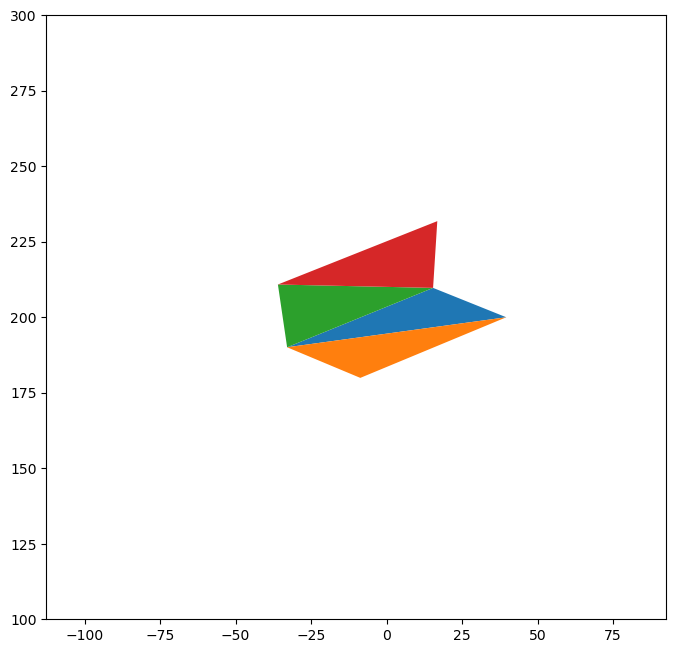

In [513]:
v_w = 4
v_h = 4
d = 1
c_w = 800
c_h = 800

#add a column with all entries one
def add_column():
    temp = np.ones((model.vertices.shape[0], 1))
    model.vertices = np.concatenate((model.vertices,temp), axis = 1)
    model.vertices = model.vertices.astype(np.longdouble)

#apply world and camera transformation to all vertices
#W*(C*v) -> the sequence is very important
def transform():
    add_column()
    w = world_space_transformation_matrix()
    c = camera_space_transformation_matrix()
    for i, vertex in enumerate(model.vertices):
        model.vertices[i] = np.dot(w, np.dot(c, vertex))

#use given formulas to find perspective transformation
def perspective_transform():
    c = []
    for i, vertex in enumerate(model.vertices):
        p_x_new = (vertex[0]*d)/vertex[2]
        p_y_new = (vertex[1]*d)/vertex[2]
        p_z_new = d
        c_x = (p_x_new*c_w)/v_w
        c_y = (p_y_new*c_h)/v_h
        temp = [c_x, c_y]
        c.append(temp)
    c = np.array(c)
    return c

#do world and camera transformations in transform finction and plain transformation
#in perspective_transform and show the result
def run():
    transform()
    result = perspective_transform()
    raster(result, 100, 300, -40, 20)

run()
    